# Mock Belt Exam (Practice)

## TASK:
Use a Private GitHub repository to save all of your files and perform your analysis.

## Part 1
- Download and unzip the zip file provided to you here. https://drive.google.com/file/d/1qszDl9TklrXD1kHuu7vtJXsEm2lwbIQ-/view
    - Unzip the files into your private repository.
- Load the provided joblib file. Display the .keys of the dictionary stored in the joblib file.
- Assign each of the keys from the dictionary as a separate variable.
- Use the preprocessor to transform the X_train/X_test data into processed dataframes. 
- Replace the column names with the correct feature names extracted from the preprocessor.

## Explain the Linear Regression Model:
- Extract the coefficients and save them as a Series with the correct feature names as the index.
- Change the pandas option for float format to display the coefficients with pandas in a readable form:
    - separator for thousands
    - 2 decimal places.
- Create a bar graph of the coefficients, sorted from largest to smallest. 
- Provide a quantitative interpretation (both magnitude and directionality) of the three largest positive coefficients explaining how that feature impacts the target.
- Provide a quantitative interpretation (both magnitude and directionality)  of the three largest negative coefficients explaining how that feature impacts the target.

## Explain the Random Forest Model:
- Extract and create a bar graph of the feature importances, sorted from largest to smallest. 
- What are the top 6 most important features? 
- Of the top 6 most important features, identify which of these features also appeared in the 3 largest or 3 smallest coefficients. 

Apply Shap to Explain the Random Forest Model

- Sample 500 rows of the processed X_train data as X_shap, using random_state=321
- Save the corresponding y_train values as y_shap
- Create a shap model explainer for the random forest model
- Calculate the shap values for the sampled data
- Create a summary plot (plot_type =’dot’) of the most important features, according to shap.
- Interpret the top 6 most important features. According to shap, what effect does each feature have on the model’s prediction?

## Load Libraries and tools

In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing tools
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

## Models & evaluation metrics
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import joblib
## setting random state for reproducibility
SEED = 321
np.random.seed(SEED)
## set text displays for sklearn
from sklearn import set_config
set_config(display='text')
## Using pd.set_option to display more columns
pd.set_option('display.max_columns',50)


import matplotlib as mpl
import os

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

pd.set_option('display.float_format',lambda x:f"{x:,.2f}")

sns.set_context('notebook',font_scale=0.9)
plt.style.use(['ggplot'])



In [2]:
loaded_joblib = joblib.load('Data/saved_model.joblib')
loaded_joblib.keys()

dict_keys(['preprocessor', 'X_train', 'X_test', 'y_train', 'y_test', 'LinearRegression', 'RandomForestRegressor'])

In [3]:
X_train = loaded_joblib['X_train']
y_train = loaded_joblib['y_train']
X_test = loaded_joblib['X_test']
y_test = loaded_joblib['y_test']
preprocessor = loaded_joblib['preprocessor']
RandomForest = loaded_joblib['RandomForestRegressor']
LinearRegression = loaded_joblib['LinearRegression']


In [4]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x124f6cf70>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x124fdb2e0>)],
                  verbose_feature_names_out=False)

In [5]:
## fit column transformer and run get_feature_names_out
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'fueltype_gas', 'enginelocation_rear'], dtype=object)

In [6]:
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                           columns = feature_names, index = X_train.index)
X_train_df.head(3)

,carlength,carwidth,carheight,curbweight,cylindernumber,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,enginelocation_rear
64,177.80,66.50,55.50,"2,425.00",4.00,84.00,"4,800.00",26.00,32.00,1.00,0.00
32,150.00,64.00,52.60,"1,837.00",4.00,60.00,"5,500.00",38.00,42.00,1.00,0.00
165,168.70,64.00,52.60,"2,265.00",4.00,112.00,"6,600.00",26.00,29.00,1.00,0.00


In [7]:
# Now we create a preprocessed DataFrame for our test set.

X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                           columns = feature_names, index = X_test.index)
X_test_df.head(3)

,carlength,carwidth,carheight,curbweight,cylindernumber,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,enginelocation_rear
101,181.70,66.50,55.10,"3,095.00",6.00,152.00,"5,200.00",17.00,22.00,1.00,0.00
111,186.70,68.40,56.70,"3,075.00",4.00,95.00,"5,000.00",19.00,24.00,1.00,0.00
142,172.00,65.40,52.50,"2,190.00",4.00,82.00,"4,400.00",28.00,33.00,1.00,0.00


In [8]:
y_test.head(3)

101   13,499.00
111   15,580.00
142    7,775.00
Name: price, dtype: float64

## Explain the Linear Regression Model:


In [9]:
## Saving the coefficients
coeffs = pd.Series(LinearRegression.coef_, index= feature_names)
coeffs

carlength                -16.31
carwidth                 111.22
carheight               -157.76
curbweight                 6.40
cylindernumber         1,394.02
horsepower                36.44
peakrpm                   -0.17
citympg                  154.59
highwaympg              -318.09
fueltype_gas          -2,856.99
enginelocation_rear   13,927.99
dtype: float64

In [10]:
pd.options.display.float_format = '{:,.2f}'.format


In [11]:
coeffs

carlength                -16.31
carwidth                 111.22
carheight               -157.76
curbweight                 6.40
cylindernumber         1,394.02
horsepower                36.44
peakrpm                   -0.17
citympg                  154.59
highwaympg              -318.09
fueltype_gas          -2,856.99
enginelocation_rear   13,927.99
dtype: float64

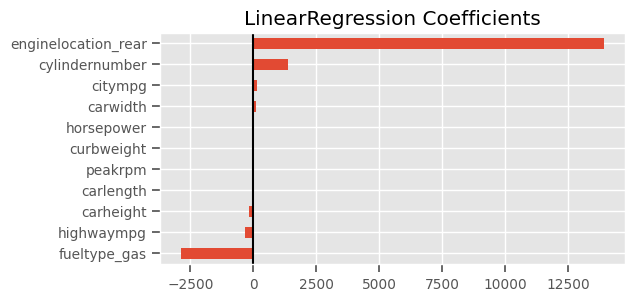

In [12]:
## Plot the coefficients
ax = coeffs.sort_values().plot(kind='barh',figsize=(6,3))
ax.axvline(0,color='k')
ax.set_title('LinearRegression Coefficients');

The three largest positive coefficients are for engine location, cylindernumber, and citympg.  

- engine location - if the engine is located in the rear of the car the predicted value of the car is increased by $13,927.99  

- cylindernumber - for every cylinder the car has the predicted value increases by $1,394.02
 
- citympg - for every unit increase in citympg the predicted value of the car increases by $154.59



The three largest negative coefficients are for carheight, highwaympg, and fueltype_gas.  

- carheight - for every unit increase in carheight the predicted value for the car decreases by $157.76

- highwaympg - for every unit increase in highwaympg the predicted value decreases by $318.09
 
- fueltype_gas - if the car uses fas as fuel the predicted value of the car decreases by $2,856.99

## Explain the Random Forest Model:


In [13]:
RandomForest.feature_importances_

array([0.02017067, 0.11072501, 0.01008707, 0.28052507, 0.07531213,
       0.31740531, 0.01971461, 0.02608494, 0.13509343, 0.00193014,
       0.00295161])

In [14]:
## Saving the feature importances
importances = pd.Series(RandomForest.feature_importances_, index= feature_names,
                       name='Feature Importance')
importances

carlength             0.02
carwidth              0.11
carheight             0.01
curbweight            0.28
cylindernumber        0.08
horsepower            0.32
peakrpm               0.02
citympg               0.03
highwaympg            0.14
fueltype_gas          0.00
enginelocation_rear   0.00
Name: Feature Importance, dtype: float64

In [15]:
## Saving the feature importances sorted from smallest to largest (ascending=True)
sorted_importance = importances.sort_values()
sorted_importance

fueltype_gas          0.00
enginelocation_rear   0.00
carheight             0.01
peakrpm               0.02
carlength             0.02
citympg               0.03
cylindernumber        0.08
carwidth              0.11
highwaympg            0.14
curbweight            0.28
horsepower            0.32
Name: Feature Importance, dtype: float64

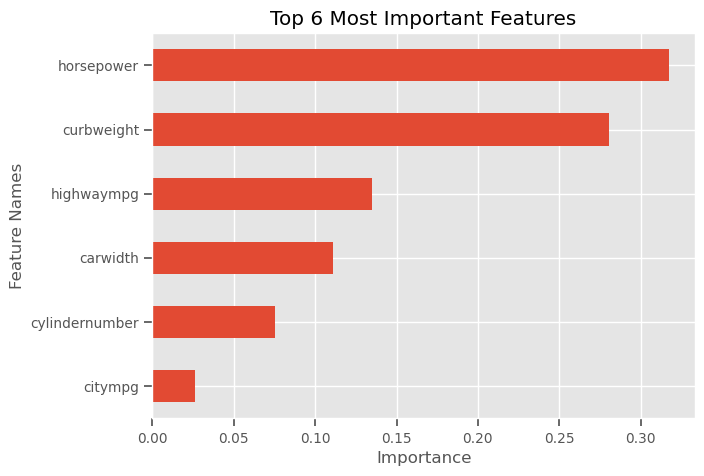

In [16]:
## plotting top 5 importances
ax = sorted_importance.tail(6).plot(kind='barh',
                                    figsize=(7,5),
                                      )
ax.set(xlabel='Importance',
        ylabel='Feature Names',
        title='Top 6 Most Important Features');

The top six most important features are horsepower, curbweight, highwaympg, carwidth, cylindernumber, and citympg.  

citympg, cylindernumber, highwaympg appeared on both lists of coefficients.

In [17]:
import shap
shap.initjs()

In [18]:
X_shap = shap.sample(X_train_df, nsamples=500, random_state=SEED)
X_shap

,carlength,carwidth,carheight,curbweight,cylindernumber,horsepower,peakrpm,citympg,highwaympg,fueltype_gas,enginelocation_rear
64,177.80,66.50,55.50,"2,425.00",4.00,84.00,"4,800.00",26.00,32.00,1.00,0.00
32,150.00,64.00,52.60,"1,837.00",4.00,60.00,"5,500.00",38.00,42.00,1.00,0.00
165,168.70,64.00,52.60,"2,265.00",4.00,112.00,"6,600.00",26.00,29.00,1.00,0.00
39,175.40,65.20,54.10,"2,304.00",4.00,86.00,"5,800.00",27.00,33.00,1.00,0.00
202,188.80,68.90,55.50,"3,012.00",6.00,134.00,"5,500.00",18.00,23.00,1.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
175,175.60,66.50,53.90,"2,414.00",4.00,92.00,"4,200.00",27.00,32.00,1.00,0.00
97,170.20,63.80,53.50,"2,037.00",4.00,69.00,"5,200.00",31.00,37.00,1.00,0.00
56,169.00,65.70,49.60,"2,380.00",2.00,101.00,"6,000.00",17.00,23.00,1.00,0.00
71,202.60,71.70,56.50,"3,740.00",8.00,155.00,"4,750.00",16.00,18.00,1.00,0.00


In [19]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap

64    11,245.00
32     5,399.00
165    9,298.00
39     8,845.00
202   21,485.00
         ...   
175    9,988.00
97     7,999.00
56    11,845.00
71    34,184.00
104   17,199.00
Name: price, Length: 153, dtype: float64

In [20]:
explainer = shap.Explainer(RandomForest)
explainer

In [21]:
# We will then calculate the shap_values by running the explainer as a 
# function with X_shap and y_shap as the arguments.
shap_values = explainer(X_shap,y_shap)
shap_values.shape

(153, 11)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


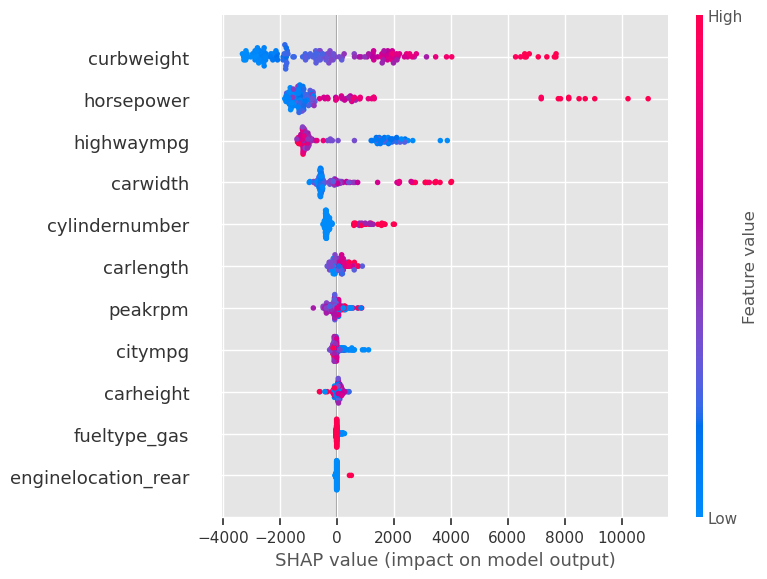

In [22]:
# Using fig.savefig
fig, ax = plt.subplots()
shap.summary_plot(shap_values,features= X_shap, plot_type='dot')
#ax.set_title('Summary SHAP Bar Plot');

ax.set(xlabel='Mean Shap Values',
            title='Summary SHAP Bar Plot')
#plt.subplots_adjust(bottom=0.15, top=1.0)
fig.tight_layout()

### Interpretation of top 6 features

Per Shap, the top 6 most important features are curbweight, horsepower, highwaympg, carwidth, cylindernumber, and carlength.

- curbweight - the heavier the car the more expensive it is predicted to be
- horsepower - the more horsepower the car has the more expensive it is predicted to be
- highwaympg - the higher the hiwhwaympg the less expensive thecar is predicted to be
- carwidth - the wider the car the more expensive the car is predicted to be
- cylindernumber - the more cylenders the car has the more expensive it is predicted to be
- carlength - the longer the car the more expensive

## Part 2

- Load the provided csv, located in the zip file you downloaded in Part 1.
- Prepare the data as a time series DataFrame:
    - Melt the wide-form data into a long-form time series.
- The date column should be named “Date”
- The value column should be named “Confirmed”
- Convert the Date column to a Datetime index.
- Set the Date column as the index

In [23]:
df = pd.read_csv("Data/us-covid-confirmed.csv")

In [24]:
display(df.head())
df.info

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,22012020,23012020,24012020,25012020,26012020,27012020,28012020,29012020,30012020,31012020,01022020,02022020,03022020,04022020,...,09012023,10012023,11012023,12012023,13012023,14012023,15012023,16012023,17012023,18012023,19012023,20012023,21012023,22012023,23012023,24012023,25012023,26012023,27012023,28012023,29012023,30012023,31012023,01022023,02022023
0,84001001,US,USA,840,"1,001.00",Autauga,Alabama,US,32.54,-86.64,"Autauga, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19205,19205,19318,19318,19318,19318,19318,19318,19318,19389,19389,19389,19389,19389,19389,19389,19471,19471,19471,19471,19471,19471,19471,19530,19530
1,84001003,US,USA,840,"1,003.00",Baldwin,Alabama,US,30.73,-87.72,"Baldwin, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,68182,68182,68518,68518,68518,68518,68518,68518,68518,68764,68764,68764,68764,68764,68764,68764,68983,68983,68983,68983,68983,68983,68983,69187,69187
2,84001005,US,USA,840,"1,005.00",Barbour,Alabama,US,31.87,-85.39,"Barbour, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7120,7120,7188,7188,7188,7188,7188,7188,7188,7258,7258,7258,7258,7258,7258,7258,7299,7299,7299,7299,7299,7299,7299,7339,7339
3,84001007,US,USA,840,"1,007.00",Bibb,Alabama,US,33.00,-87.13,"Bibb, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7808,7808,7855,7855,7855,7855,7855,7855,7855,7889,7889,7889,7889,7889,7889,7889,7919,7919,7919,7919,7919,7919,7919,7967,7967
4,84001009,US,USA,840,"1,009.00",Blount,Alabama,US,33.98,-86.57,"Blount, Alabama, US",0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17952,17952,18057,18057,18057,18057,18057,18057,18057,18130,18130,18130,18130,18130,18130,18130,18255,18255,18255,18255,18255,18255,18255,18349,18349


<bound method DataFrame.info of            UID iso2 iso3  code3      FIPS      Admin2 Province_State  \
0     84001001   US  USA    840  1,001.00     Autauga        Alabama   
1     84001003   US  USA    840  1,003.00     Baldwin        Alabama   
2     84001005   US  USA    840  1,005.00     Barbour        Alabama   
3     84001007   US  USA    840  1,007.00        Bibb        Alabama   
4     84001009   US  USA    840  1,009.00      Blount        Alabama   
...        ...  ...  ...    ...       ...         ...            ...   
3337  84056039   US  USA    840 56,039.00       Teton        Wyoming   
3338  84056041   US  USA    840 56,041.00       Uinta        Wyoming   
3339  84090056   US  USA    840 90,056.00  Unassigned        Wyoming   
3340  84056043   US  USA    840 56,043.00    Washakie        Wyoming   
3341  84056045   US  USA    840 56,045.00      Weston        Wyoming   

     Country_Region   Lat   Long_             Combined_Key  22012020  \
0                US 32.54  -86.

In [25]:
melted = pd.melt(df.drop(columns=['UID','iso2','iso3','code3','Admin2', 'Combined_Key']),
                 id_vars=['FIPS', 'Province_State','Country_Region','Lat', 'Long_'],
                value_name='Confirmed',var_name="Date")
melted

,FIPS,Province_State,Country_Region,Lat,Long_,Date,Confirmed
0,"1,001.00",Alabama,US,32.54,-86.64,22012020,0
1,"1,003.00",Alabama,US,30.73,-87.72,22012020,0
2,"1,005.00",Alabama,US,31.87,-85.39,22012020,0
3,"1,007.00",Alabama,US,33.00,-87.13,22012020,0
4,"1,009.00",Alabama,US,33.98,-86.57,22012020,0
...,...,...,...,...,...,...,...
3702931,"56,039.00",Wyoming,US,43.94,-110.59,02022023,12058
3702932,"56,041.00",Wyoming,US,41.29,-110.55,02022023,6317
3702933,"90,056.00",Wyoming,US,0.00,0.00,02022023,0
3702934,"56,043.00",Wyoming,US,43.90,-107.68,02022023,2729


In [26]:
states_to_keep = [ 'New York', "New Jersey", "Pennsylvania", 'Delaware', 
                  'Rhode Island', 'Maryland', "Virginia", "North Carolina"]

In [27]:
df_filtered = melted[melted['Province_State'].isin(states_to_keep)]

In [28]:
fmt = "%d%m%Y"
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'], format=fmt)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [29]:
df_filtered

,FIPS,Province_State,Country_Region,Lat,Long_,Date,Confirmed
333,"10,001.00",Delaware,US,39.09,-75.57,2020-01-22,0
334,"10,003.00",Delaware,US,39.58,-75.64,2020-01-22,0
335,"80,010.00",Delaware,US,0.00,0.00,2020-01-22,0
336,"10,005.00",Delaware,US,38.66,-75.39,2020-01-22,0
337,"90,010.00",Delaware,US,0.00,0.00,2020-01-22,0
...,...,...,...,...,...,...,...
3702734,"51,830.00",Virginia,US,37.28,-76.71,2023-02-02,2280
3702735,"51,840.00",Virginia,US,39.17,-78.17,2023-02-02,8107
3702736,"51,195.00",Virginia,US,36.97,-82.62,2023-02-02,13721
3702737,"51,197.00",Virginia,US,36.92,-81.08,2023-02-02,9551


In [30]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477548 entries, 333 to 3702738
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FIPS            477548 non-null  float64       
 1   Province_State  477548 non-null  object        
 2   Country_Region  477548 non-null  object        
 3   Lat             477548 non-null  float64       
 4   Long_           477548 non-null  float64       
 5   Date            477548 non-null  datetime64[ns]
 6   Confirmed       477548 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 29.1+ MB


In [31]:
df_ts = df_filtered.set_index('Date')

In [32]:
df_ts = df_ts.loc['05/2020':]

In [33]:
df_ts

,FIPS,Province_State,Country_Region,Lat,Long_,Confirmed
Date,,,,,,
2020-05-01,"10,001.00",Delaware,US,39.09,-75.57,773
2020-05-01,"10,003.00",Delaware,US,39.58,-75.64,1829
2020-05-01,"80,010.00",Delaware,US,0.00,0.00,0
2020-05-01,"10,005.00",Delaware,US,38.66,-75.39,2292
2020-05-01,"90,010.00",Delaware,US,0.00,0.00,24
...,...,...,...,...,...,...
2023-02-02,"51,830.00",Virginia,US,37.28,-76.71,2280
2023-02-02,"51,840.00",Virginia,US,39.17,-78.17,8107
2023-02-02,"51,195.00",Virginia,US,36.97,-82.62,13721


In [34]:
df_ts.to_csv('Data/data-for-tableau.csv')

In [35]:
ts = df_ts.groupby('Province_State').resample("M").sum()
ts.head()

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will defa

FIPS      Lat     Long_  Confirmed
Province_State Date                                                 
Delaware       2020-05-31 6,200,899.00 3,637.16 -7,024.59     229083
               2020-06-30 6,000,870.00 3,519.83 -6,797.99     312601
               2020-07-31 6,200,899.00 3,637.16 -7,024.59     410198
               2020-08-31 6,200,899.00 3,637.16 -7,024.59     503506
               2020-09-30 6,000,870.00 3,519.83 -6,797.99     572135

In [36]:
ts

FIPS        Lat       Long_  Confirmed
Province_State Date                                                       
Delaware       2020-05-31   6,200,899.00   3,637.16   -7,024.59     229083
               2020-06-30   6,000,870.00   3,519.83   -6,797.99     312601
               2020-07-31   6,200,899.00   3,637.16   -7,024.59     410198
               2020-08-31   6,200,899.00   3,637.16   -7,024.59     503506
               2020-09-30   6,000,870.00   3,519.83   -6,797.99     572135
...                                  ...        ...         ...        ...
Virginia       2022-10-31 216,634,603.00 154,885.24 -323,712.03   65231936
               2022-11-30 209,646,390.00 149,888.94 -313,269.71   64045669
               2022-12-31 216,634,603.00 154,885.24 -323,712.03   67443271
               2023-01-31 216,634,603.00 154,885.24 -323,712.03   69192486
               2023-02-28  13,976,426.00   9,992.60  -20,884.65    4521592

[272 rows x 4 columns]

In [43]:
plot_ts = ts.unstack(0)['Confirmed']

<AxesSubplot: xlabel='Date'>

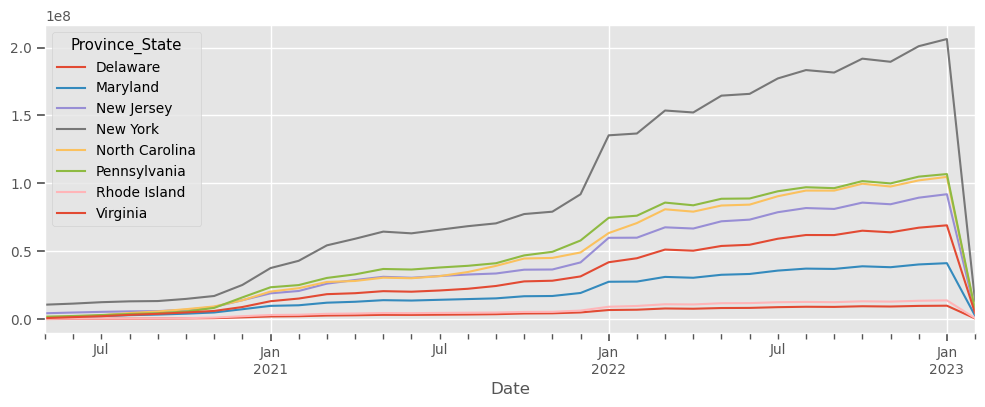

In [44]:
plot_ts.plot(figsize = (12,4))